In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import plot_importance
%matplotlib inline


In [2]:
df = pd.read_csv('./criminal_train.csv')
df = df.drop(columns=['PERID'])
df = shuffle(df, random_state=101)
print(df.head())



       IFATHER  NRCH17_2  IRHHSIZ2  IIHHSIZ2  IRKI17_2  IIKI17_2  IRHH65_2  \
45460        4         2         6         1         3         1         2   
38218        4         0         2         1         1         1         1   
15625        4         1         3         1         2         1         1   
40695        4         0         3         1         1         1         1   
31052        4         0         2         1         1         1         1   

       IIHH65_2  PRXRETRY  PRXYDATA    ...     TOOLONG  TROUBUND  PDEN10  \
45460         1        99        99    ...           2         2       2   
38218         1        99        99    ...           2         2       1   
15625         1        99        99    ...           2         2       3   
40695         1        99        99    ...           2         2       2   
31052         1        99        99    ...           2         2       1   

       COUTYP2  MAIIN102  AIIND102      ANALWT_C  VESTR  VEREP  Criminal  

In [3]:
X = df.drop(columns=['Criminal'])
y = df['Criminal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
eval_set = [(X_test, y_test)]




In [4]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = precision_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.05%


/home/kuuhaku/anaconda3/envs/tfkeras/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [5]:
model.fit(X_train, y_train, eval_metric="error",early_stopping_rounds=30, eval_set=eval_set, verbose=True)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = precision_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.053478
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.053696
[2]	validation_0-error:0.053478
[3]	validation_0-error:0.053696
[4]	validation_0-error:0.053642
[5]	validation_0-error:0.053642
[6]	validation_0-error:0.053642
[7]	validation_0-error:0.053642
[8]	validation_0-error:0.053368
[9]	validation_0-error:0.053368
[10]	validation_0-error:0.053368
[11]	validation_0-error:0.053368
[12]	validation_0-error:0.053368
[13]	validation_0-error:0.053368
[14]	validation_0-error:0.053368
[15]	validation_0-error:0.053368
[16]	validation_0-error:0.053368
[17]	validation_0-error:0.053368
[18]	validation_0-error:0.053368
[19]	validation_0-error:0.053368
[20]	validation_0-error:0.053368
[21]	validation_0-error:0.053368
[22]	validation_0-error:0.053368
[23]	validation_0-error:0.053368
[24]	validation_0-error:0.053368
[25]	validation_0-error:0.053368
[26]	validation_0-error:0.053368
[27]	validation_0-error:0.053368
[28]	validation_0-er

/home/kuuhaku/anaconda3/envs/tfkeras/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.04775281 0.01123596 0.01123596 0.         0.0252809  0.
 0.01404494 0.         0.02247191 0.00280899 0.01123596 0.01123596
 0.         0.00280899 0.21910113 0.         0.00842697 0.0252809
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0252809  0.         0.
 0.         0.00280899 0.         0.         0.         0.
 0.         0.         0.         0.         0.01404494 0.01404494
 0.         0.03651685 0.         0.         0.01123596 0.
 0.         0.         0.00280899 0.         0.         0.
 0.01123596 0.10955057 0.21348314 0.         0.01404494 0.00280899
 0.0252809  0.00280899 0.00280899 0.         0.00561798 0.
 0.         0.06460674 0.0252809  0.00280899]


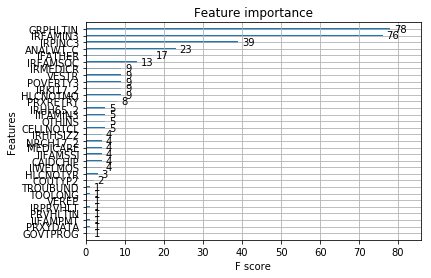

['IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IRKI17_2', 'IRHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE', 'CAIDCHIP', 'PRVHLTIN', 'GRPHLTIN', 'HLCNOTYR', 'HLCNOTMO', 'IRMEDICR', 'IRPRVHLT', 'OTHINS', 'CELLNOTCL', 'IRFAMSOC', 'IIFAMSSI', 'IIFAMPMT', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'COUTYP2', 'ANALWT_C', 'VESTR', 'VEREP']


In [6]:
print(model.feature_importances_)
plot_importance(model)
pyplot.show()
imp_features = []
[imp_features.append(i) for i,j in zip(X_train.columns, model.feature_importances_) if j != 0]
print(imp_features)

In [7]:
model2 = XGBClassifier()
model2.fit(X_train[imp_features], y_train)
y_pred = model2.predict(X_test[imp_features])
predictions = [round(value) for value in y_pred]
accuracy = precision_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.05%


/home/kuuhaku/anaconda3/envs/tfkeras/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [8]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search1 = GridSearchCV(model, param_test1, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result1 = grid_search1.fit(X_train[imp_features], y_train)

In [9]:
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

Best: -0.103012 using {'min_child_weight': 1, 'max_depth': 5}


In [10]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[1,2,3]
}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search2 = GridSearchCV(model, param_test2, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result2 = grid_search2.fit(X_train[imp_features], y_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: -0.102943 using {'min_child_weight': 2, 'max_depth': 5}


In [11]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search3 = GridSearchCV(model, param_test3, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result3 = grid_search3.fit(X_train[imp_features], y_train)
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

Best: -0.104086 using {'gamma': 0.0}


In [ ]:
eval_set = [(X_test[imp_features], y_test)]
model3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=2,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model3.fit(X_train[imp_features], y_train, eval_metric="error",early_stopping_rounds=50, eval_set=eval_set, verbose=True)
y_pred = model3.predict(X_test[imp_features])
predictions = [round(value) for value in y_pred]
accuracy = precision_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-error:0.059602
Will train until validation_0-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.047846
[2]	validation_0-error:0.046752
[3]	validation_0-error:0.045276
[4]	validation_0-error:0.04544
[5]	validation_0-error:0.045494
[6]	validation_0-error:0.045822
[7]	validation_0-error:0.045822
[8]	validation_0-error:0.045658
[9]	validation_0-error:0.045494
[10]	validation_0-error:0.04533
[11]	validation_0-error:0.045494
[12]	validation_0-error:0.045549
[13]	validation_0-error:0.04533
[14]	validation_0-error:0.045385
[15]	validation_0-error:0.045385
[16]	validation_0-error:0.045276
[17]	validation_0-error:0.045276
[18]	validation_0-error:0.04533
[19]	validation_0-error:0.045494
[20]	validation_0-error:0.045604
[21]	validation_0-error:0.04544
[22]	validation_0-error:0.045494
[23]	validation_0-error:0.045549
[24]	validation_0-error:0.045385
[25]	validation_0-error:0.045494
[26]	validation_0-error:0.045549
[27]	validation_0-error:0.04544
[28]	validation_0-error:0.

/home/kuuhaku/anaconda3/envs/tfkeras/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search4 = GridSearchCV(model3, param_test4, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result4 = grid_search4.fit(X_train[imp_features], y_train)
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))